In [ ]:
#Catalog Cross-Selling- Affinity Analysis/ Apriori Algorithm and Collaborative Filtering

#Background- Exeter, Inc. is a catalog firm that sells products in a number of different catalogs that it owns. 
#The catalogs number in the dozens, but fall into nine basic categories:
#1. Clothing 2. Housewares 3. Health 4. Automotive 5. Personal electronics 6. Computers 7. Garden 8. Novelty gift 9. Jewelry
#The costs of printing and distributing catalogs are high. By far the biggest cost of operation is the cost of promoting products to people
#who buy nothing. Having invested so much in the production of artwork and printing of catalogs, Exeter wants to take every
#opportunity to use them effectively. One such opportunity is in crossselling—once a customer has “taken the bait” and purchases one
#product, try to sell them another while you have their attention. Such cross-promotion might take the form of enclosing a catalog in the
#shipment of a purchased product, together with a discount coupon to induce a purchase from that catalog. Or, it might take the form of a
#similar coupon sent by e-mail, with a link to the web version of that catalog. But which catalog should be enclosed in the box or included as a link
#in the e-mail with the discount coupon? Exeter would like it to be an informed choice—a catalog that has a higher probability of inducing a
#purchase than simply choosing a catalog at random.

#Assignment- Using the dataset CatalogCrossSell.csv, perform an association rules analysis, and comment on the results. Your discussion should provide
#interpretations in English of the meanings of the various output statistics (lift ratio, confidence, support) and include a very rough
# estimate (precise calculations are not necessary) of the extent to which this will help Exeter make an informed choice about which catalog to
#cross-promote to a purchaser

In [ ]:
pip install mlxtend

In [1]:
%matplotlib inline
from pathlib import Path
import heapq
from collections import defaultdict
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Load and preprocess data set 
df = pd.read_csv('CatalogCrossSell.csv')
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
#df.columns
df.set_index('Customer_Number', inplace=True)
df

,Clothing_Division,Housewares_Division,Health_Products_Division,Automotive_Division,Personal_Electronics_Division,Computers_Division,Garden_Division,Novelty_Gift_Division,Jewelry_Division
Customer_Number,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
337441034,0,0,1,0,0,0,0,0,0
337498968,0,1,1,0,0,0,1,0,1
337516678,0,0,1,0,1,0,0,0,1


In [3]:
# create frequent itemsets
itemsets = apriori(df, min_support=0.05, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
print('Number of rules', len(rules))

rules.sort_values(by=['lift'], ascending=False).head(6)

print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

Number of rules 206
                                           antecedents  \
205  (Garden_Division, Personal_Electronics_Divisio...   
201  (Health_Products_Division, Garden_Division, Pe...   
166  (Garden_Division, Personal_Electronics_Divisio...   
179  (Garden_Division, Personal_Electronics_Divisio...   
122  (Garden_Division, Personal_Electronics_Divisio...   
174  (Health_Products_Division, Garden_Division, Pe...   

                                           consequents   support  confidence  \
205  (Health_Products_Division, Novelty_Gift_Division)  0.053221    0.605923   
201                            (Novelty_Gift_Division)  0.053221    0.605923   
166                            (Novelty_Gift_Division)  0.053221    0.605923   
179  (Health_Products_Division, Novelty_Gift_Division)  0.057623    0.585366   
122                            (Novelty_Gift_Division)  0.057623    0.585366   
174                            (Novelty_Gift_Division)  0.057623    0.585366   

         lif

In [4]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
201,"(Health_Products_Division, Garden_Division, Pe...",(Novelty_Gift_Division),0.087835,0.227491,0.053221,0.605923,2.663501,0.033240,1.960297
166,"(Garden_Division, Personal_Electronics_Divisio...",(Novelty_Gift_Division),0.087835,0.227491,0.053221,0.605923,2.663501,0.033240,1.960297
122,"(Garden_Division, Personal_Electronics_Divisio...",(Novelty_Gift_Division),0.098439,0.227491,0.057623,0.585366,2.573139,0.035229,1.863110
174,"(Health_Products_Division, Garden_Division, Pe...",(Novelty_Gift_Division),0.098439,0.227491,0.057623,0.585366,2.573139,0.035229,1.863110
71,"(Automotive_Division, Personal_Electronics_Div...",(Garden_Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599
135,"(Health_Products_Division, Automotive_Division...",(Garden_Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599


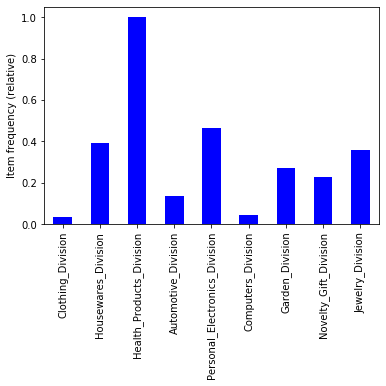

In [5]:
# determine item frequencies
itemFrequency = df.sum(axis=0) / len(df)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [6]:
# create frequent itemsets and rules by confidence keeping it 0.5 with support = 0.05
itemsets = apriori(df, min_support=0.05, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 206
                                           antecedents  \
205  (Garden_Division, Personal_Electronics_Divisio...   
201  (Health_Products_Division, Garden_Division, Pe...   
166  (Garden_Division, Personal_Electronics_Divisio...   
179  (Garden_Division, Personal_Electronics_Divisio...   
122  (Garden_Division, Personal_Electronics_Divisio...   
174  (Health_Products_Division, Garden_Division, Pe...   
71   (Automotive_Division, Personal_Electronics_Div...   
135  (Health_Products_Division, Automotive_Division...   
138  (Automotive_Division, Personal_Electronics_Div...   
133          (Jewelry_Division, Novelty_Gift_Division)   
196          (Jewelry_Division, Novelty_Gift_Division)   
194  (Health_Products_Division, Novelty_Gift_Divisi...   
144  (Health_Products_Division, Garden_Division, Pe...   
148   (Garden_Division, Personal_Electronics_Division)   
74    (Garden_Division, Personal_Electronics_Division)   
53                               (Automotive_Divisio

In [7]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,"(Automotive_Division, Personal_Electronics_Div...",(Garden_Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599
74,"(Garden_Division, Personal_Electronics_Division)",(Novelty_Gift_Division),0.163265,0.227491,0.087235,0.534314,2.348725,0.050094,1.658861
12,(Automotive_Division),(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
51,"(Health_Products_Division, Automotive_Division)",(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
41,"(Garden_Division, Housewares_Division)",(Novelty_Gift_Division),0.132853,0.227491,0.068828,0.518072,2.277331,0.038605,1.602956
82,"(Jewelry_Division, Novelty_Gift_Division)",(Garden_Division),0.107243,0.272109,0.063025,0.587687,2.159748,0.033843,1.765383
76,"(Personal_Electronics_Division, Novelty_Gift_D...",(Garden_Division),0.169068,0.272109,0.087235,0.515976,1.896213,0.041230,1.503834
43,"(Housewares_Division, Novelty_Gift_Division)",(Garden_Division),0.134854,0.272109,0.068828,0.510386,1.875668,0.032133,1.486663
47,"(Jewelry_Division, Novelty_Gift_Division)",(Housewares_Division),0.107243,0.393557,0.075430,0.703358,1.787181,0.033224,2.044360
73,"(Automotive_Division, Personal_Electronics_Div...",(Jewelry_Division),0.083033,0.356943,0.051621,0.621687,1.741699,0.021983,1.699801


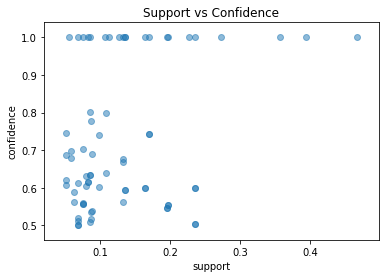

In [8]:
# Scatterplot of support with confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

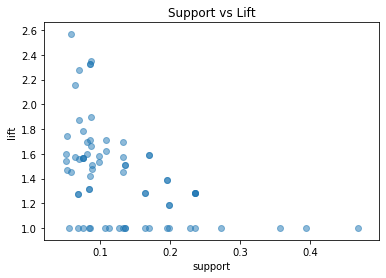

In [9]:
# Scatterplot of support with Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

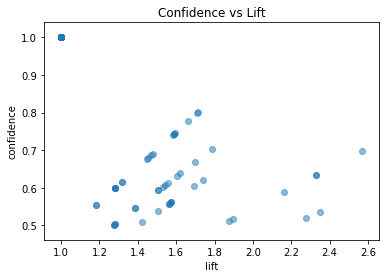

In [10]:
# Scatterplot of confidence with Lift
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Confidence vs Lift')
plt.show()

In [11]:
# create frequent itemsets and rules by lift, here we ignored confidence, but take lift atleast 2.
itemsets1 = apriori(df, min_support=0.05, use_colnames=True)
rules1 = association_rules(itemsets, metric='lift', min_threshold=2)

print('Number of rules', len(rules1))

# Display 25 rules with highest lift
rules1.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules1.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 132
                                           antecedents  \
116  (Health_Products_Division, Novelty_Gift_Divisi...   
73           (Jewelry_Division, Novelty_Gift_Division)   
119  (Health_Products_Division, Garden_Division, Pe...   
127   (Garden_Division, Personal_Electronics_Division)   
68    (Garden_Division, Personal_Electronics_Division)   
124          (Jewelry_Division, Novelty_Gift_Division)   
113  (Health_Products_Division, Garden_Division, Pe...   
120  (Garden_Division, Personal_Electronics_Divisio...   
66   (Garden_Division, Personal_Electronics_Divisio...   
123  (Health_Products_Division, Novelty_Gift_Division)   
75                             (Novelty_Gift_Division)   
130                            (Novelty_Gift_Division)   
10    (Garden_Division, Personal_Electronics_Division)   
13                               (Automotive_Division)   
53                               (Automotive_Division)   
49     (Health_Products_Division, Automotive_Divisio

In [12]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules1 = rules1[[len(c) <= 2 for c in rules1.antecedents]]
rules1 = rules1[[len(c) == 1 for c in rules1.consequents]]

rules1.sort_values(by=['lift'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(Garden_Division, Personal_Electronics_Division)",(Automotive_Division),0.163265,0.134854,0.058023,0.355392,2.635386,0.036006,1.342128
11,"(Automotive_Division, Personal_Electronics_Div...",(Garden_Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599
14,"(Garden_Division, Personal_Electronics_Division)",(Novelty_Gift_Division),0.163265,0.227491,0.087235,0.534314,2.348725,0.050094,1.658861
0,(Garden_Division),(Automotive_Division),0.272109,0.134854,0.085434,0.313971,2.328227,0.048739,1.261092
1,(Automotive_Division),(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
6,"(Health_Products_Division, Garden_Division)",(Automotive_Division),0.272109,0.134854,0.085434,0.313971,2.328227,0.048739,1.261092
7,"(Health_Products_Division, Automotive_Division)",(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
4,"(Garden_Division, Housewares_Division)",(Novelty_Gift_Division),0.132853,0.227491,0.068828,0.518072,2.277331,0.038605,1.602956
16,"(Garden_Division, Jewelry_Division)",(Novelty_Gift_Division),0.127251,0.227491,0.063025,0.495283,2.177154,0.034077,1.530579
17,"(Jewelry_Division, Novelty_Gift_Division)",(Garden_Division),0.107243,0.272109,0.063025,0.587687,2.159748,0.033843,1.765383


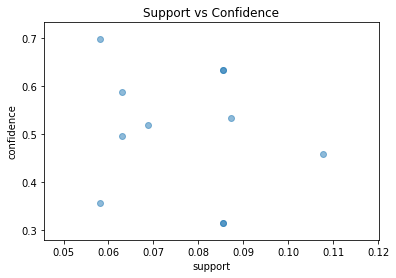

In [13]:
# Scatterplot of support with confidence
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

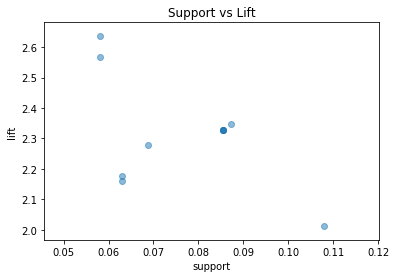

In [14]:
# Scatterplot of support with Lift
plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

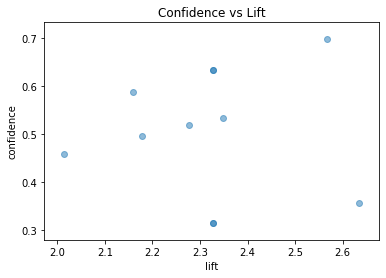

In [15]:
# Scatterplot of confidence with Lift
plt.scatter(rules1['lift'], rules1['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Confidence vs Lift')
plt.show()

In [16]:
# create frequent itemsets and rules by support, here we focused mainly on support, keeping aside confidence and lift.
itemsets = apriori(df, min_support=0.05, use_colnames=True)
rules2 = association_rules(itemsets, metric='support', min_threshold=0.1)

print('Number of rules', len(rules2))

# Display 25 rules with highest lift
rules2.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules2.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 132
                                           antecedents  \
104  (Health_Products_Division, Personal_Electronic...   
56   (Personal_Electronics_Division, Housewares_Div...   
61                             (Novelty_Gift_Division)   
110  (Health_Products_Division, Novelty_Gift_Division)   
111  (Personal_Electronics_Division, Housewares_Div...   
117                            (Novelty_Gift_Division)   
90                                   (Garden_Division)   
87   (Health_Products_Division, Novelty_Gift_Division)   
86         (Health_Products_Division, Garden_Division)   
91                             (Novelty_Gift_Division)   
26                                   (Garden_Division)   
27                             (Novelty_Gift_Division)   
113       (Housewares_Division, Novelty_Gift_Division)   
59                     (Personal_Electronics_Division)   
108  (Health_Products_Division, Personal_Electronic...   
106  (Health_Products_Division, Housewares_Division.

In [17]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules2 = rules2[[len(c) <= 2 for c in rules2.antecedents]]
rules2 = rules2[[len(c) == 1 for c in rules2.consequents]]

rules2.sort_values(by=['lift'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,"(Personal_Electronics_Division, Housewares_Div...",(Novelty_Gift_Division),0.235494,0.227491,0.107843,0.457944,2.013020,0.054270,1.425146
26,(Garden_Division),(Novelty_Gift_Division),0.272109,0.227491,0.112245,0.412500,1.813259,0.050343,1.314909
27,(Novelty_Gift_Division),(Garden_Division),0.227491,0.272109,0.112245,0.493404,1.813259,0.050343,1.436827
86,"(Health_Products_Division, Garden_Division)",(Novelty_Gift_Division),0.272109,0.227491,0.112245,0.412500,1.813259,0.050343,1.314909
87,"(Health_Products_Division, Novelty_Gift_Division)",(Garden_Division),0.227491,0.272109,0.112245,0.493404,1.813259,0.050343,1.436827
58,"(Housewares_Division, Novelty_Gift_Division)",(Personal_Electronics_Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120
63,"(Personal_Electronics_Division, Jewelry_Division)",(Housewares_Division),0.197479,0.393557,0.132053,0.668693,1.699099,0.054333,1.830455
57,"(Personal_Electronics_Division, Novelty_Gift_D...",(Housewares_Division),0.169068,0.393557,0.107843,0.637870,1.620780,0.041305,1.674654
74,"(Health_Products_Division, Personal_Electronic...",(Novelty_Gift_Division),0.467387,0.227491,0.169068,0.361729,1.590082,0.062741,1.210316
22,(Personal_Electronics_Division),(Novelty_Gift_Division),0.467387,0.227491,0.169068,0.361729,1.590082,0.062741,1.210316


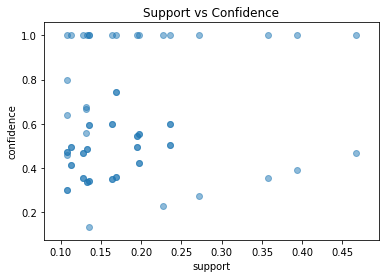

In [18]:
# Scatterplot of support with confidence
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

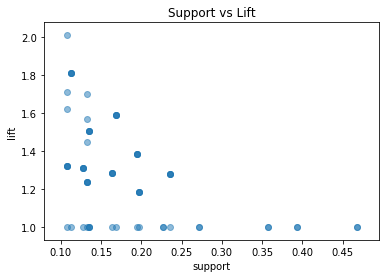

In [19]:
# Scatterplot of support with Lift
plt.scatter(rules2['support'], rules2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

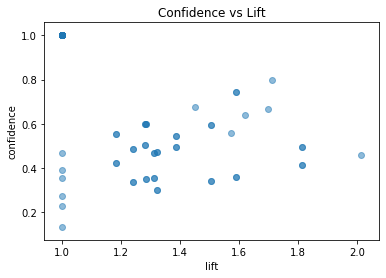

In [20]:
# Scatterplot of confidence with Lift
plt.scatter(rules2['lift'], rules2['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Confidence vs Lift')
plt.show()

In [35]:
# AS, we have tested the different scenarios and we made our decision to stay with support=0.05, confidence = 0.5
# and will seek for lift more than 1.
# create frequent itemsets and rules by confidence

itemsets = apriori(df, min_support=0.05, use_colnames=True)
rules3 = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules3))

# Display 25 rules with highest lift
rules3.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules3.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 206
                                           antecedents  \
205  (Garden_Division, Personal_Electronics_Divisio...   
201  (Health_Products_Division, Garden_Division, Pe...   
166  (Garden_Division, Personal_Electronics_Divisio...   
179  (Garden_Division, Personal_Electronics_Divisio...   
122  (Garden_Division, Personal_Electronics_Divisio...   
174  (Health_Products_Division, Garden_Division, Pe...   
71   (Automotive_Division, Personal_Electronics_Div...   
135  (Health_Products_Division, Automotive_Division...   
138  (Automotive_Division, Personal_Electronics_Div...   
133          (Jewelry_Division, Novelty_Gift_Division)   
196          (Jewelry_Division, Novelty_Gift_Division)   
194  (Health_Products_Division, Novelty_Gift_Divisi...   
144  (Health_Products_Division, Garden_Division, Pe...   
148   (Garden_Division, Personal_Electronics_Division)   
74    (Garden_Division, Personal_Electronics_Division)   
53                               (Automotive_Divisio

In [22]:
# Filter rules by number of antecedents (maximum 1) and consequents (maximum 1)
rules3 = rules3[[len(c) == 1 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 1 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Automotive_Division),(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
15,(Novelty_Gift_Division),(Personal_Electronics_Division),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
13,(Automotive_Division),(Jewelry_Division),0.134854,0.356943,0.075230,0.557864,1.562893,0.027095,1.454431
4,(Novelty_Gift_Division),(Housewares_Division),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
5,(Jewelry_Division),(Housewares_Division),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
11,(Automotive_Division),(Personal_Electronics_Division),0.134854,0.467387,0.083033,0.615727,1.317382,0.020004,1.386028
14,(Garden_Division),(Personal_Electronics_Division),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
2,(Personal_Electronics_Division),(Housewares_Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
3,(Housewares_Division),(Personal_Electronics_Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
1,(Automotive_Division),(Housewares_Division),0.134854,0.393557,0.067627,0.501484,1.274233,0.014554,1.216495


In [26]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules3 = rules3[[len(c) == 2 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 1 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,"(Automotive_Division, Personal_Electronics_Div...",(Garden_Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599
74,"(Garden_Division, Personal_Electronics_Division)",(Novelty_Gift_Division),0.163265,0.227491,0.087235,0.534314,2.348725,0.050094,1.658861
51,"(Health_Products_Division, Automotive_Division)",(Garden_Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
41,"(Garden_Division, Housewares_Division)",(Novelty_Gift_Division),0.132853,0.227491,0.068828,0.518072,2.277331,0.038605,1.602956
82,"(Jewelry_Division, Novelty_Gift_Division)",(Garden_Division),0.107243,0.272109,0.063025,0.587687,2.159748,0.033843,1.765383
76,"(Personal_Electronics_Division, Novelty_Gift_D...",(Garden_Division),0.169068,0.272109,0.087235,0.515976,1.896213,0.041230,1.503834
43,"(Housewares_Division, Novelty_Gift_Division)",(Garden_Division),0.134854,0.272109,0.068828,0.510386,1.875668,0.032133,1.486663
47,"(Jewelry_Division, Novelty_Gift_Division)",(Housewares_Division),0.107243,0.393557,0.075430,0.703358,1.787181,0.033224,2.044360
73,"(Automotive_Division, Personal_Electronics_Div...",(Jewelry_Division),0.083033,0.356943,0.051621,0.621687,1.741699,0.021983,1.699801
80,"(Jewelry_Division, Novelty_Gift_Division)",(Personal_Electronics_Division),0.107243,0.467387,0.085834,0.800373,1.712442,0.035710,2.668043


In [28]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 2)
rules3 = rules3[[len(c) == 2 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 2 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
138,"(Automotive_Division, Personal_Electronics_Div...","(Health_Products_Division, Garden_Division)",0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599
133,"(Jewelry_Division, Novelty_Gift_Division)","(Personal_Electronics_Division, Housewares_Div...",0.107243,0.235494,0.063625,0.593284,2.519313,0.038370,1.879702
148,"(Garden_Division, Personal_Electronics_Division)","(Health_Products_Division, Novelty_Gift_Division)",0.163265,0.227491,0.087235,0.534314,2.348725,0.050094,1.658861
109,"(Garden_Division, Housewares_Division)","(Health_Products_Division, Novelty_Gift_Division)",0.132853,0.227491,0.068828,0.518072,2.277331,0.038605,1.602956
126,"(Garden_Division, Novelty_Gift_Division)","(Personal_Electronics_Division, Housewares_Div...",0.112245,0.235494,0.057623,0.513369,2.179964,0.031190,1.571017
165,"(Jewelry_Division, Novelty_Gift_Division)","(Health_Products_Division, Garden_Division)",0.107243,0.272109,0.063025,0.587687,2.159748,0.033843,1.765383
150,"(Personal_Electronics_Division, Novelty_Gift_D...","(Health_Products_Division, Garden_Division)",0.169068,0.272109,0.087235,0.515976,1.896213,0.041230,1.503834
111,"(Housewares_Division, Novelty_Gift_Division)","(Health_Products_Division, Garden_Division)",0.134854,0.272109,0.068828,0.510386,1.875668,0.032133,1.486663
121,"(Jewelry_Division, Novelty_Gift_Division)","(Health_Products_Division, Housewares_Division)",0.107243,0.393557,0.075430,0.703358,1.787181,0.033224,2.044360
143,"(Automotive_Division, Personal_Electronics_Div...","(Health_Products_Division, Jewelry_Division)",0.083033,0.356943,0.051621,0.621687,1.741699,0.021983,1.699801


In [30]:
# Filter rules by number of antecedents (maximum 3) and consequents (maximum 2)
rules3 = rules3[[len(c) == 3 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 2 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
205,"(Garden_Division, Personal_Electronics_Divisio...","(Health_Products_Division, Novelty_Gift_Division)",0.087835,0.227491,0.053221,0.605923,2.663501,0.033240,1.960297
179,"(Garden_Division, Personal_Electronics_Divisio...","(Health_Products_Division, Novelty_Gift_Division)",0.098439,0.227491,0.057623,0.585366,2.573139,0.035229,1.863110
194,"(Health_Products_Division, Novelty_Gift_Divisi...","(Personal_Electronics_Division, Housewares_Div...",0.107243,0.235494,0.063625,0.593284,2.519313,0.038370,1.879702
202,"(Jewelry_Division, Personal_Electronics_Divisi...","(Health_Products_Division, Garden_Division)",0.085834,0.272109,0.053221,0.620047,2.278671,0.029865,1.915738
177,"(Health_Products_Division, Garden_Division, No...","(Personal_Electronics_Division, Housewares_Div...",0.112245,0.235494,0.057623,0.513369,2.179964,0.031190,1.571017
176,"(Personal_Electronics_Division, Housewares_Div...","(Health_Products_Division, Garden_Division)",0.107843,0.272109,0.057623,0.534323,1.963636,0.028278,1.563081
192,"(Jewelry_Division, Personal_Electronics_Divisi...","(Health_Products_Division, Housewares_Division)",0.085834,0.393557,0.063625,0.741259,1.883483,0.029845,2.343819
185,"(Garden_Division, Personal_Electronics_Divisio...","(Health_Products_Division, Housewares_Division)",0.087835,0.393557,0.062825,0.715262,1.817427,0.028257,2.129826
204,"(Jewelry_Division, Garden_Division, Novelty_Gi...","(Health_Products_Division, Personal_Electronic...",0.063025,0.467387,0.053221,0.844444,1.806735,0.023764,3.423941
195,"(Jewelry_Division, Housewares_Division, Novelt...","(Health_Products_Division, Personal_Electronic...",0.075430,0.467387,0.063625,0.843501,1.804717,0.028370,3.403307


In [32]:
# Filter rules by number of antecedents (maximum 4) and consequents (maximum 1)
rules3 = rules3[[len(c) == 4 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 1 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
201,"(Health_Products_Division, Garden_Division, Pe...",(Novelty_Gift_Division),0.087835,0.227491,0.053221,0.605923,2.663501,0.033240,1.960297
174,"(Health_Products_Division, Garden_Division, Pe...",(Novelty_Gift_Division),0.098439,0.227491,0.057623,0.585366,2.573139,0.035229,1.863110
197,"(Health_Products_Division, Personal_Electronic...",(Garden_Division),0.085834,0.272109,0.053221,0.620047,2.278671,0.029865,1.915738
171,"(Health_Products_Division, Personal_Electronic...",(Garden_Division),0.107843,0.272109,0.057623,0.534323,1.963636,0.028278,1.563081
188,"(Health_Products_Division, Personal_Electronic...",(Housewares_Division),0.085834,0.393557,0.063625,0.741259,1.883483,0.029845,2.343819
181,"(Health_Products_Division, Garden_Division, Pe...",(Housewares_Division),0.087835,0.393557,0.062825,0.715262,1.817427,0.028257,2.129826
200,"(Health_Products_Division, Garden_Division, No...",(Personal_Electronics_Division),0.063025,0.467387,0.053221,0.844444,1.806735,0.023764,3.423941
191,"(Health_Products_Division, Housewares_Division...",(Personal_Electronics_Division),0.075430,0.467387,0.063625,0.843501,1.804717,0.028370,3.403307
173,"(Health_Products_Division, Garden_Division, Ho...",(Personal_Electronics_Division),0.068828,0.467387,0.057623,0.837209,1.791255,0.025454,3.271766
182,"(Health_Products_Division, Garden_Division, Pe...",(Jewelry_Division),0.098439,0.356943,0.062825,0.638211,1.787994,0.027688,1.777439


In [34]:
# Filter rules by number of antecedents (maximum 4) and consequents (maximum 1)
rules3 = rules3[[len(c) == 2 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 3 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
196,"(Jewelry_Division, Novelty_Gift_Division)","(Health_Products_Division, Personal_Electronic...",0.107243,0.235494,0.063625,0.593284,2.519313,0.03837,1.879702
180,"(Garden_Division, Novelty_Gift_Division)","(Health_Products_Division, Personal_Electronic...",0.112245,0.235494,0.057623,0.513369,2.179964,0.03119,1.571017


In [36]:
# Filter rules by number of antecedents (maximum 1) and consequents (maximum 2)
rules3 = rules3[[len(c) == 1 for c in rules3.antecedents]]
rules3 = rules3[[len(c) == 2 for c in rules3.consequents]]

rules3.sort_values(by=['lift'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(Automotive_Division),"(Health_Products_Division, Garden_Division)",0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229
63,(Novelty_Gift_Division),"(Health_Products_Division, Personal_Electronic...",0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
57,(Automotive_Division),"(Health_Products_Division, Jewelry_Division)",0.134854,0.356943,0.075230,0.557864,1.562893,0.027095,1.454431
28,(Novelty_Gift_Division),"(Health_Products_Division, Housewares_Division)",0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
31,(Jewelry_Division),"(Health_Products_Division, Housewares_Division)",0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
50,(Automotive_Division),"(Health_Products_Division, Personal_Electronic...",0.134854,0.467387,0.083033,0.615727,1.317382,0.020004,1.386028
60,(Garden_Division),"(Health_Products_Division, Personal_Electronic...",0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
23,(Personal_Electronics_Division),"(Health_Products_Division, Housewares_Division)",0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
24,(Housewares_Division),"(Health_Products_Division, Personal_Electronic...",0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
19,(Automotive_Division),"(Health_Products_Division, Housewares_Division)",0.134854,0.393557,0.067627,0.501484,1.274233,0.014554,1.216495
